# Árboles y bosques aleatorios

Supongamos que tenemos estos datos ...

<img src="img/img_999(018).png" width=650/>

¿Cómo podríamos generar el siguiente árbol de decisión?, ¿cómo sabríamos qué variables nos dan más información para ponerlas en los primeros niveles de decisión?

<img src="img/img_999(019).png" width=650/>

Las **reglas de decisión** para obtener una cosecha óptima serían:

<img src="img/img_999(020).png" width=550/>

# Matemáticas detrás de un árbol de decisión

## Homogeneidad

<img src="img/img_999(021).png" width=600/>

De las 4 variables predictoras, buscamos aquella que nos de una distribución lo más homogénea posible de la variable a predecir, en este caso la fertilidad de los terrenos. Es decir, **la que es capaz de agrupar más datos**.

<img src="img/img_999(022).png" width=600/>

Vemos que la que distribuye mejor la fertilidad de los terrenos es la variable **lluvias**. Vemos que la **lluvia = Baja** agrupa a más del 70% de los datos asignando una fertilidad **Pobre**.

# Entropía

<img src="img/img_999(023).png" width=450/>

<img src="img/img_999(024).png" width=450/>

<img src="img/img_999(025).png" width=450/>

<img src="img/img_999(026).png" width=650/>


# Ganancia de información o incremento de entropía.

Entropía del dataset sobre la variable objetivo.

<img src="img/img_999(027).png" width=650/>

Ahora podemos estudiar para cada una de las variables predictoras, cuál es la aporta más incremento a la entropía. En este ejemplo estudiamos la variable **Terreno**.

<img src="img/img_999(028).png" width=650/>

Por tanto, la ganancia de información en caso de escoger **Terreno** como nodo de división en el árbol será ...

<img src="img/img_999(029).png" width=650/>

Será 0.14 puntos. Si lo repetimos para todas las variables predictoras tenemos que:

* 0.14 puntos para el terreno
* 0.42 puntos para las lluvias
* 0.36 puntos para fertilizantes
* 0.16 puntos para aguas subterráneas

Por tanto, la variable que demuestra una máxima ganancia de información es la que se elige como primer nodo de clasificación. En nuestro caso, **lluvias**. **Porque es la que más disminuye la entropía.**

# Índice de Gini

<img src="img/img_999(031).png" width=550/>

<img src="img/img_999(032).png" width=550/>

<img src="img/img_999(033).png" width=550/>

<img src="img/img_999(034).png" width=550/>

<img src="img/img_999(035).png" width=550/>

<img src="img/img_999(037).png" width=550/>

# Algoritmo para crear árboles de decisión

<img src="img/img_999(030).png" width=650/>

# Árbol de decisión para especies de flores

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
data.shape

(150, 5)

In [56]:
# ¿Cuántas especies tenemos en total?
data["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
# Obtengamos las variables predictoras
predictors = data.columns.values[:4]
predictors

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
      dtype=object)

In [58]:
# Obtengamos la target
target = data.columns.values[4]
target

'Species'

In [59]:
# Dividimos el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=42)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Entrenamiento del modelo

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=42)

In [63]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=42)

# Predicciones

In [64]:
preds = tree.predict(X_test)

In [65]:
pd.crosstab(y_test, preds, rownames=["Actual"], colnames=["Predicciones"])

Predicciones,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


# Visualización del árbol de decisión

Se necesitan 4 pasos

In [66]:
from sklearn.tree import export_graphviz

In [67]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [68]:
import os
from graphviz import Source

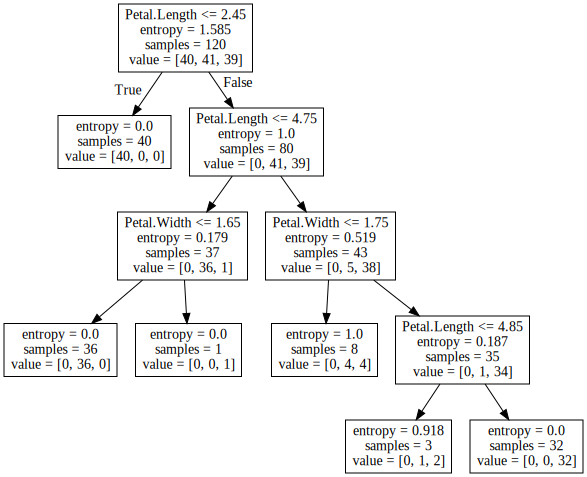

In [69]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
Source(text)

# Validación cruzada en un árbol de decisión

Cross Validation para la poda. Uno de los parámetros que utilizábamos para crear nuestro DecisionTreeClassifier era el **min_samples_split**, el **max_depth**, ... **tenemos que ajustarlos para obtener un clasificador óptimo**.

**Por tanto vamos a ir podando el árbol para tener una profundidad óptima y sin tener problemas de overfitting**.

In [70]:
X = data[predictors]
y = data[target]

In [71]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=42)

In [72]:
# Para implementar la validación cruzada utilizamos sklearn
from sklearn.model_selection import KFold

In [73]:
# n = nº de elementos que van a ser clasificados
# n_folds = nº de validaciones a realizar
# shuffle = True si queremos que haga un muestreo aleatorio
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
import numpy as np
scores = cross_val_score(tree, X, y, scoring="accuracy", cv=cv, n_jobs=1)
scores

array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       0.86666667, 0.86666667, 0.93333333, 0.93333333, 0.93333333])

In [76]:
score = np.mean(scores)
score

0.9466666666666667

Hemos obtenido una eficacia muy alta

In [77]:
# Variemos la profundidad del árbol y veamos el resultado
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=42)
    tree.fit(X, y)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(tree, X, y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ", i, " es de ", score)

Score para i =  1  es de  0.6066666666666667
Score para i =  2  es de  0.9466666666666667
Score para i =  3  es de  0.9533333333333334
Score para i =  4  es de  0.9466666666666667
Score para i =  5  es de  0.9466666666666667
Score para i =  6  es de  0.9466666666666667
Score para i =  7  es de  0.9466666666666667
Score para i =  8  es de  0.9466666666666667
Score para i =  9  es de  0.9466666666666667
Score para i =  10  es de  0.9466666666666667


Podemos ver que la clasificación con mejor performance es para i = 3

# Clasificación de variables por importancia

Podemos ver cuáles de las variables predictoras tiene más peso a la hora de generar la clasificación. Se trata de agregar un print con **tree.feature_importances_**

In [78]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=42)
    tree.fit(X, y)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(tree, X, y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ", i, " es de ", score)
    print("     ", tree.feature_importances_)

Score para i =  1  es de  0.6066666666666667
      [0. 0. 1. 0.]
Score para i =  2  es de  0.9466666666666667
      [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9533333333333334
      [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9466666666666667
      [0.         0.         0.66869158 0.33130842]


In [79]:
predictors

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
      dtype=object)

**Vemos que para i=3, el 0.68% de la información se la lleva Petal.Length y el 0.31% se la lleva Petal.Width**

# Árboles de regresión

Se tratan cuando tenemos variables numéricas continuas. Se trataría de definir subconjuntos o umbrales entre los valores de las distintas variables.

<img src="img/img_999(041).png" width=650/>

<img src="img/img_999(042).png" width=650/>

## Ventajas

<img src="img/img_999(043).png" width=650/>

# Ejemplo de árbol de regresión

Cargamos el dataset de las casas de Boston. La mayoría de las variables son continuas y la variable objetivo también es continua.

In [80]:
import pandas as pd

In [81]:
data = pd.read_csv("datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [82]:
data.shape

(506, 14)

In [83]:
# Definimos nuestros conjuntos X e y
colnames = data.columns.values
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
y = data[target]

In [84]:
from sklearn.tree import DecisionTreeRegressor  # Vemos que tomamos Regressor

In [85]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=42)
regtree.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30,
                      random_state=42)

## Realicemos algunas predicciones y evaluemos el modelo

In [86]:
preds = regtree.predict(data[predictors])
data["preds"] = preds

In [87]:
# Comparemos
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


Vemos que la predicción coincide porque la *y* cae en el mismo nodo hoja. Estudiemos ahora la representación del árbol.

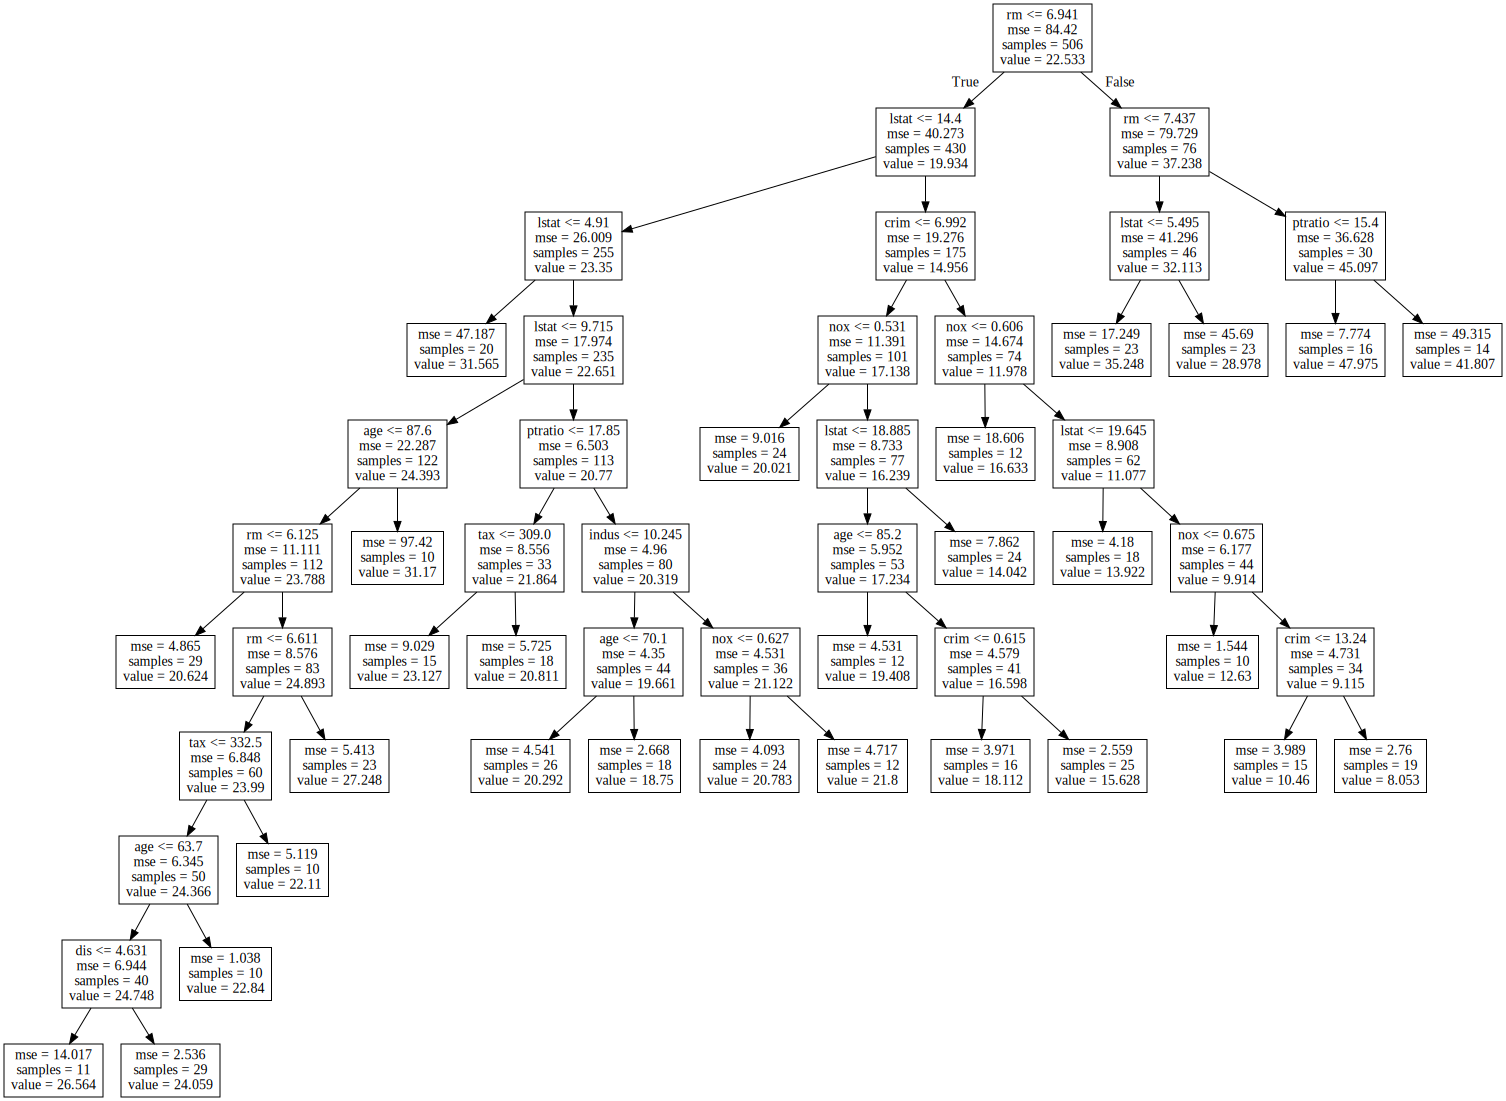

In [88]:
from sklearn.tree import export_graphviz
with open("resources/boston_houses_dtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
import os
from graphviz import Source
file = open("resources/boston_houses_dtree.dot", "r")
text = file.read()
Source(text)

## Validación cruzada para estudiar la consistencia del modelo

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [90]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(regtree, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=1)
score = np.mean(scores)
print("Scores ", scores)
print(" Score " , score)

Scores  [-11.41710312 -20.42379177 -15.67286877 -19.44653413 -31.88399981
 -27.69375402 -12.93730663 -19.59240495 -16.69053191 -27.84939302]
 Score  -20.360768811894822


In [91]:
print("Importancia de las variables:")
list(zip(predictors, regtree.feature_importances_))

Importancia de las variables:


[('crim', 0.034212032306401664),
 ('zn', 0.0),
 ('indus', 0.0011605887788362535),
 ('chas', 0.0),
 ('nox', 0.01856163073811281),
 ('rm', 0.6308568014336987),
 ('age', 0.01725115143448252),
 ('dis', 0.0013745115995799774),
 ('rad', 0.0),
 ('tax', 0.002369830529879818),
 ('ptratio', 0.009333247332534616),
 ('black', 0.0),
 ('lstat', 0.2848802058464736)]

# Random forest para regresión

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
# n_jobs: tareas en paralelo
# oob_score: hace un muestreo aleatorio
# n_estimators: nº de árboles
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10)

In [94]:
forest.fit(X,y)

/home/jcla/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

In [95]:
forest.oob_prediction_

array([33.4       , 22.73333333, 33.25      , 33.95      , 35.13333333,
       24.96      , 20.3       , 15.55      , 19.7       , 19.5       ,
       23.56666667, 20.28333333, 20.76666667, 19.3       , 18.9       ,
       21.075     , 21.53333333, 18.725     , 16.375     , 20.73333333,
       13.54      , 26.4       , 16.05      , 14.2       , 14.82      ,
       15.6       , 17.9       , 15.33333333, 17.15      , 23.5       ,
       14.95      , 19.16      , 14.15      , 15.23333333, 13.2       ,
       21.05      , 21.775     , 20.8       , 22.775     , 26.34      ,
       31.6       , 28.85      , 23.45      ,  0.        , 26.9       ,
       19.16666667, 18.35      , 18.5       , 17.9       , 20.06666667,
       21.53333333, 24.3       , 27.23333333, 20.28      , 19.85      ,
       34.2       , 21.93333333, 30.56666667, 21.1       , 20.225     ,
       19.56      , 19.56      , 24.06666667, 27.05      , 32.9       ,
       22.45      , 20.25      , 19.96666667, 19.34285714, 21.24

In [96]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,33.400000,24.0
1,22.733333,21.6
2,33.250000,34.7
3,33.950000,33.4
4,35.133333,36.2
...,...,...
501,24.933333,22.4
502,22.400000,20.6
503,32.975000,23.9
504,26.875000,22.0


In [97]:
# Calculo del error cuadrádico medio para la regresión. Aquí no necesitamos validación cruzada.
data["rforest_error"] = (data["rforest_pred"] - data["medv"]) ** 2
sum(data["rforest_error"]) / len(data)

19.93186072386465

Vemos que hemos bajado un poquito el error. Antes teníamos 20 y pico y ahora tenemos 19.77.

Otro parámetro que podemos estudiar es el oob_score, es similiar al coeficiente de determinación que se estudiaba en la regresión lineal.

In [98]:
forest.oob_score_

0.7638952201194565

Podemos repetir la prueba y aumentar el número de estimadores **n_estimators** para que nuestro bosque tenga más árboles.

# Random forest para clasificación

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# n_jobs: tareas en paralelo
# oob_score: hace un muestreo aleatorio
# n_estimators: nº de árboles
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

In [101]:
# Utilizamos los datos de las flores
data = pd.read_csv("datasets/iris/iris.csv")
predictors = data.columns.values[:4]
target = data.columns.values[4]

In [102]:
forest.fit(data[predictors], data[target])

RandomForestClassifier(n_jobs=2, oob_score=True)

In [103]:
# Con esto obtenemos la probabilidad de que cada observación pertenezca a una clase u otra
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [104]:
forest.oob_score_

0.9466666666666667

Con este score veo que he aumentado la precisión de nuestro algoritmo.